In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
train=pd.read_csv(r"D:\Elevet labs\New folder\task5\train.csv")
gender_submission=pd.read_csv(r"D:\Elevet labs\New folder\task5\gender_submission.csv")
test=pd.read_csv(r"D:\Elevet labs\New folder\task5\test.csv")

In [110]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
print(test)
print(gender_submission)
print(test)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [6]:
print(train.describe())
print(gender_submission.describe())
print(test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000 

In [5]:
print(train.info())
print(gender_submission.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived  

In [6]:
print(train.value_counts())
print(gender_submission.value_counts())
print(test.value_counts())

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [71]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [130]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

C:\Users\nhari\AppData\Local\Temp\ipykernel_25008\758740272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

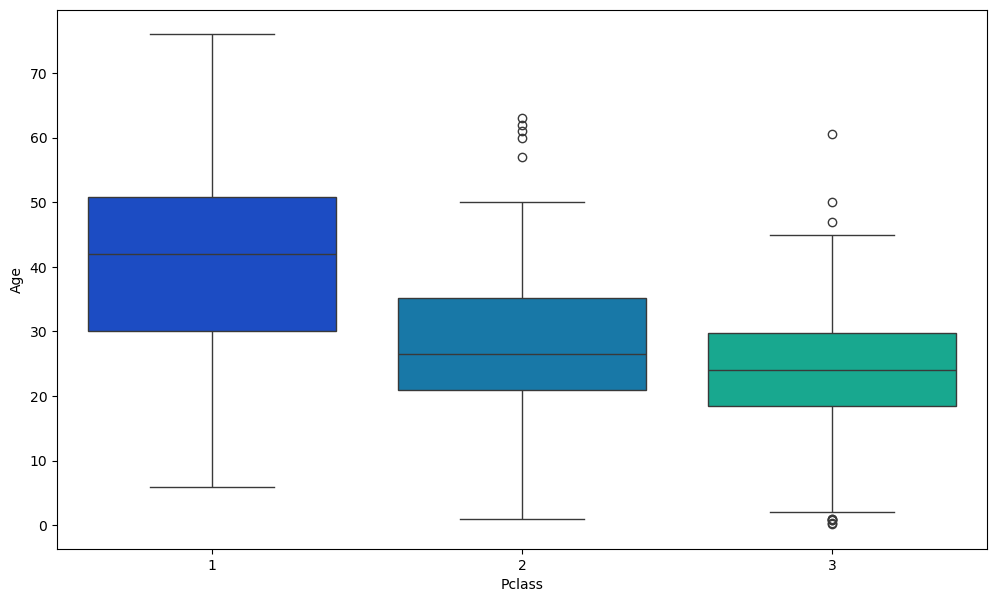

In [117]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

In [118]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 40

        elif Pclass == 2:
            return 28

        else:
            return 24

    else:
        return Age

In [123]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\nhari\AppData\Local\Temp\ipykernel_25008\3524370102.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\nhari\AppData\Local\Temp\ipykernel_25008\3524370102.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

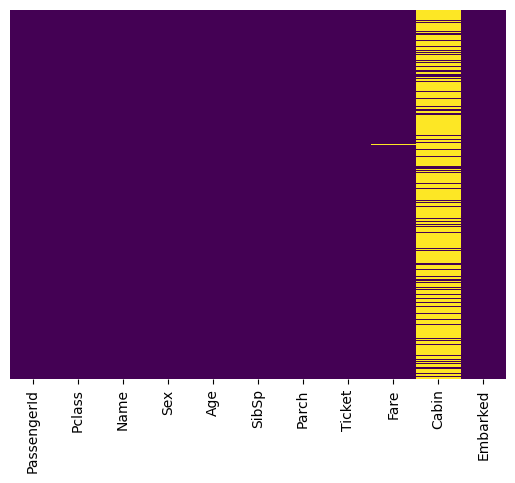

In [124]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\nhari\AppData\Local\Temp\ipykernel_25008\1683851715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

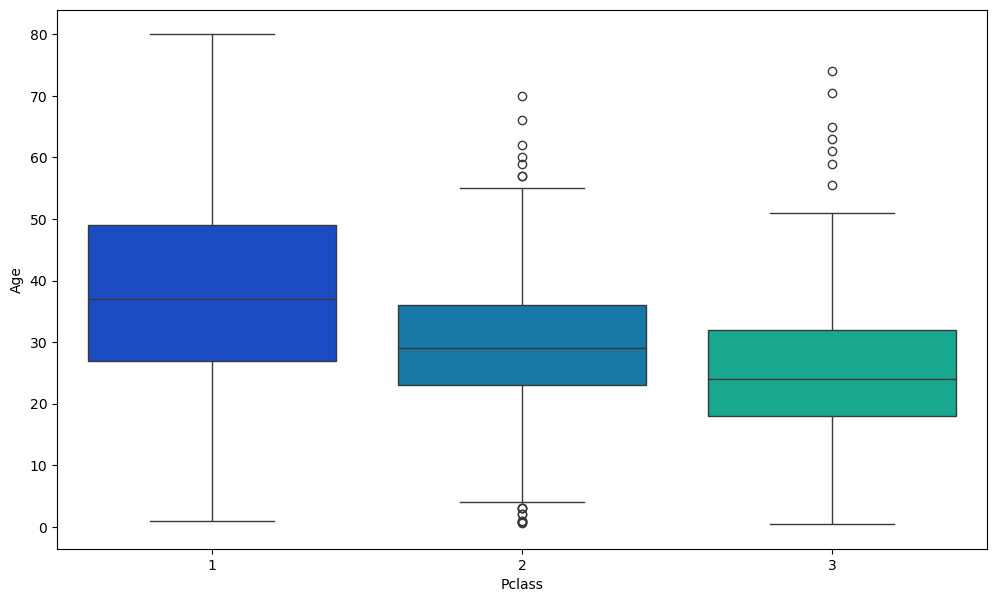

In [111]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [113]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [114]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\nhari\AppData\Local\Temp\ipykernel_25008\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\nhari\AppData\Local\Temp\ipykernel_25008\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

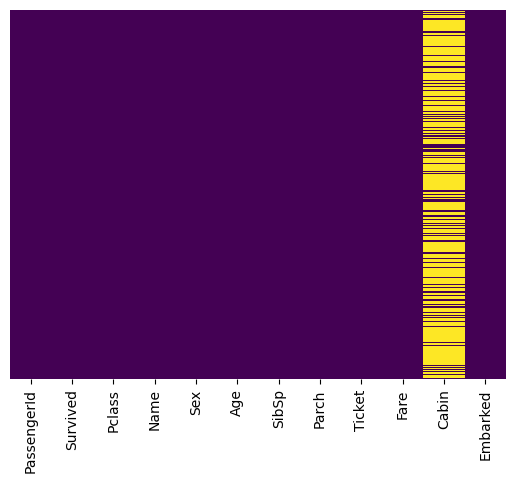

In [115]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [87]:
train=train.fillna({'Age':age_mean,'Embarked':mode})
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

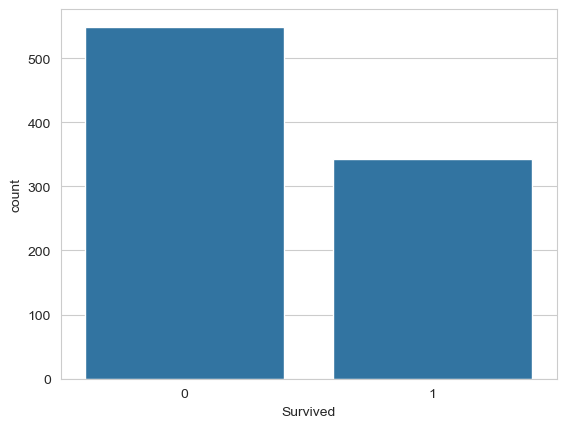

In [133]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

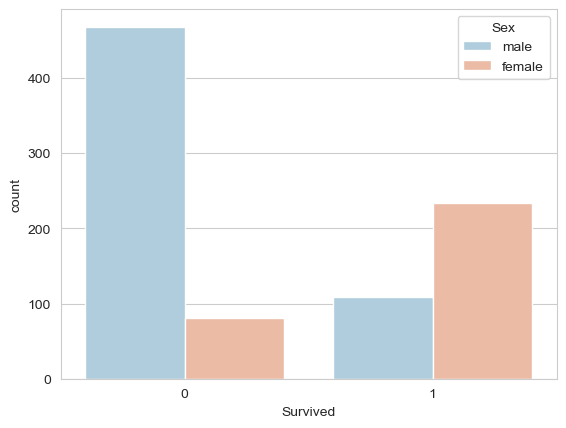

In [134]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

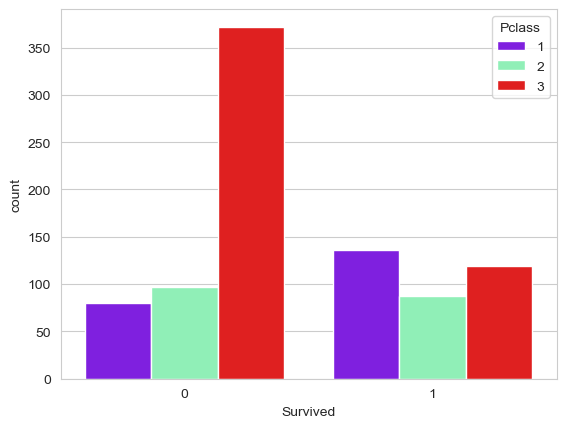

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: >

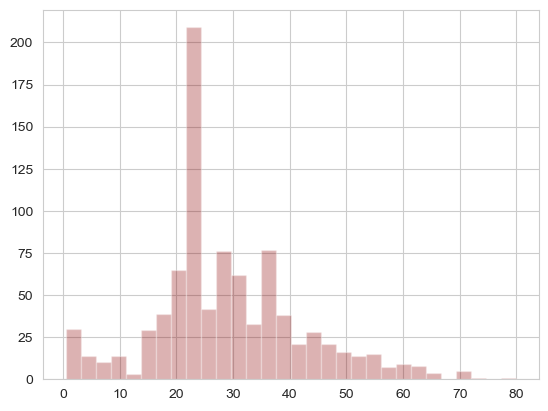

In [137]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

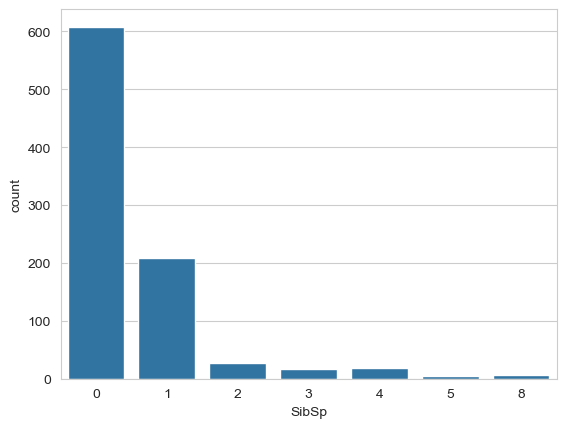

In [138]:
sns.countplot(x='SibSp',data=train)

<Axes: >

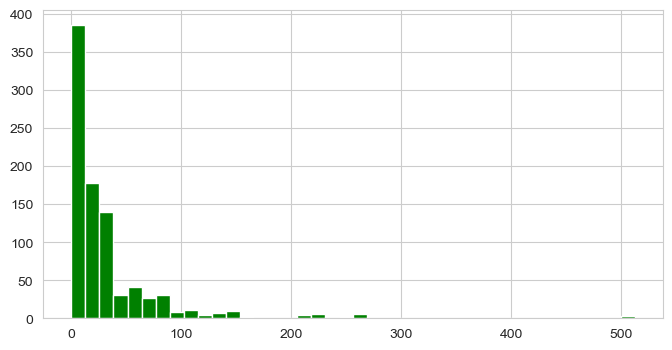

In [139]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [105]:
merged_df = pd.merge(test, gender_submission, on='PassengerId', how='outer')

# Show the result
print(merged_df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1  


In [106]:
merged_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,0


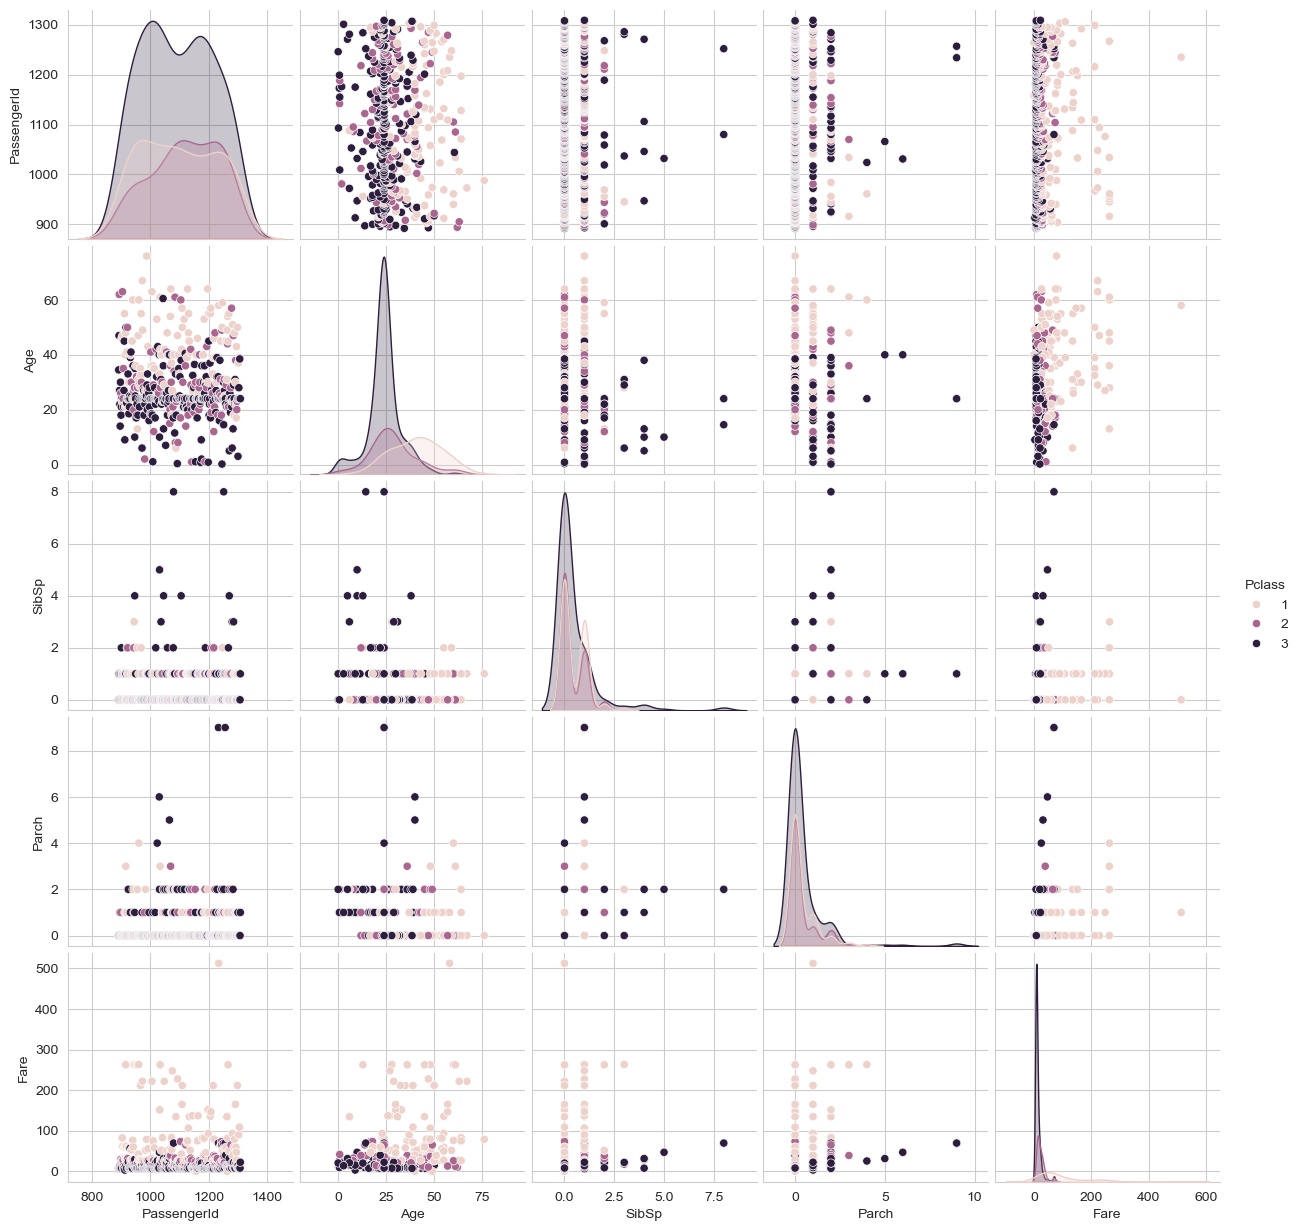

In [142]:
sns.pairplot(test, hue="Pclass")

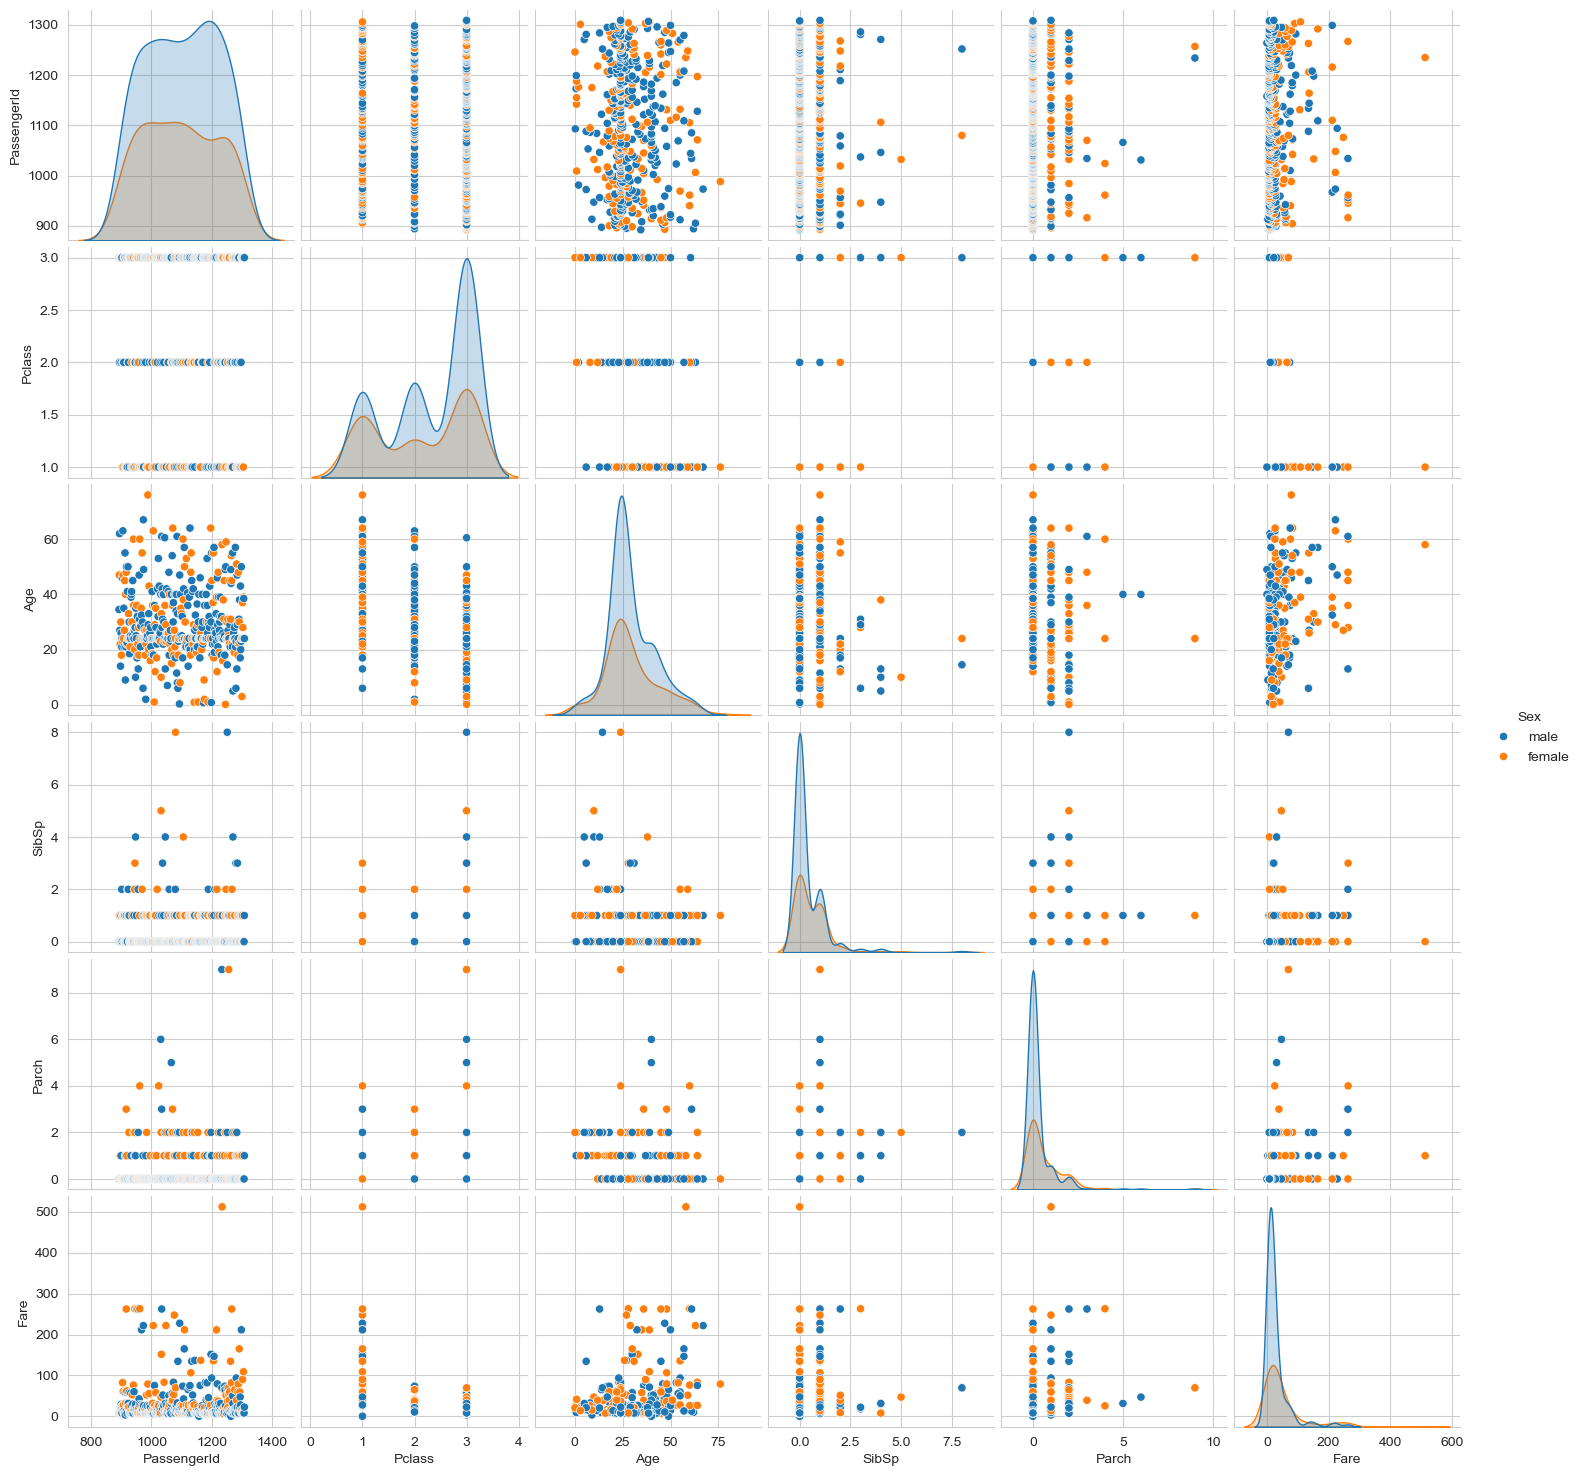

In [147]:
sns.pairplot(test, hue="Sex")

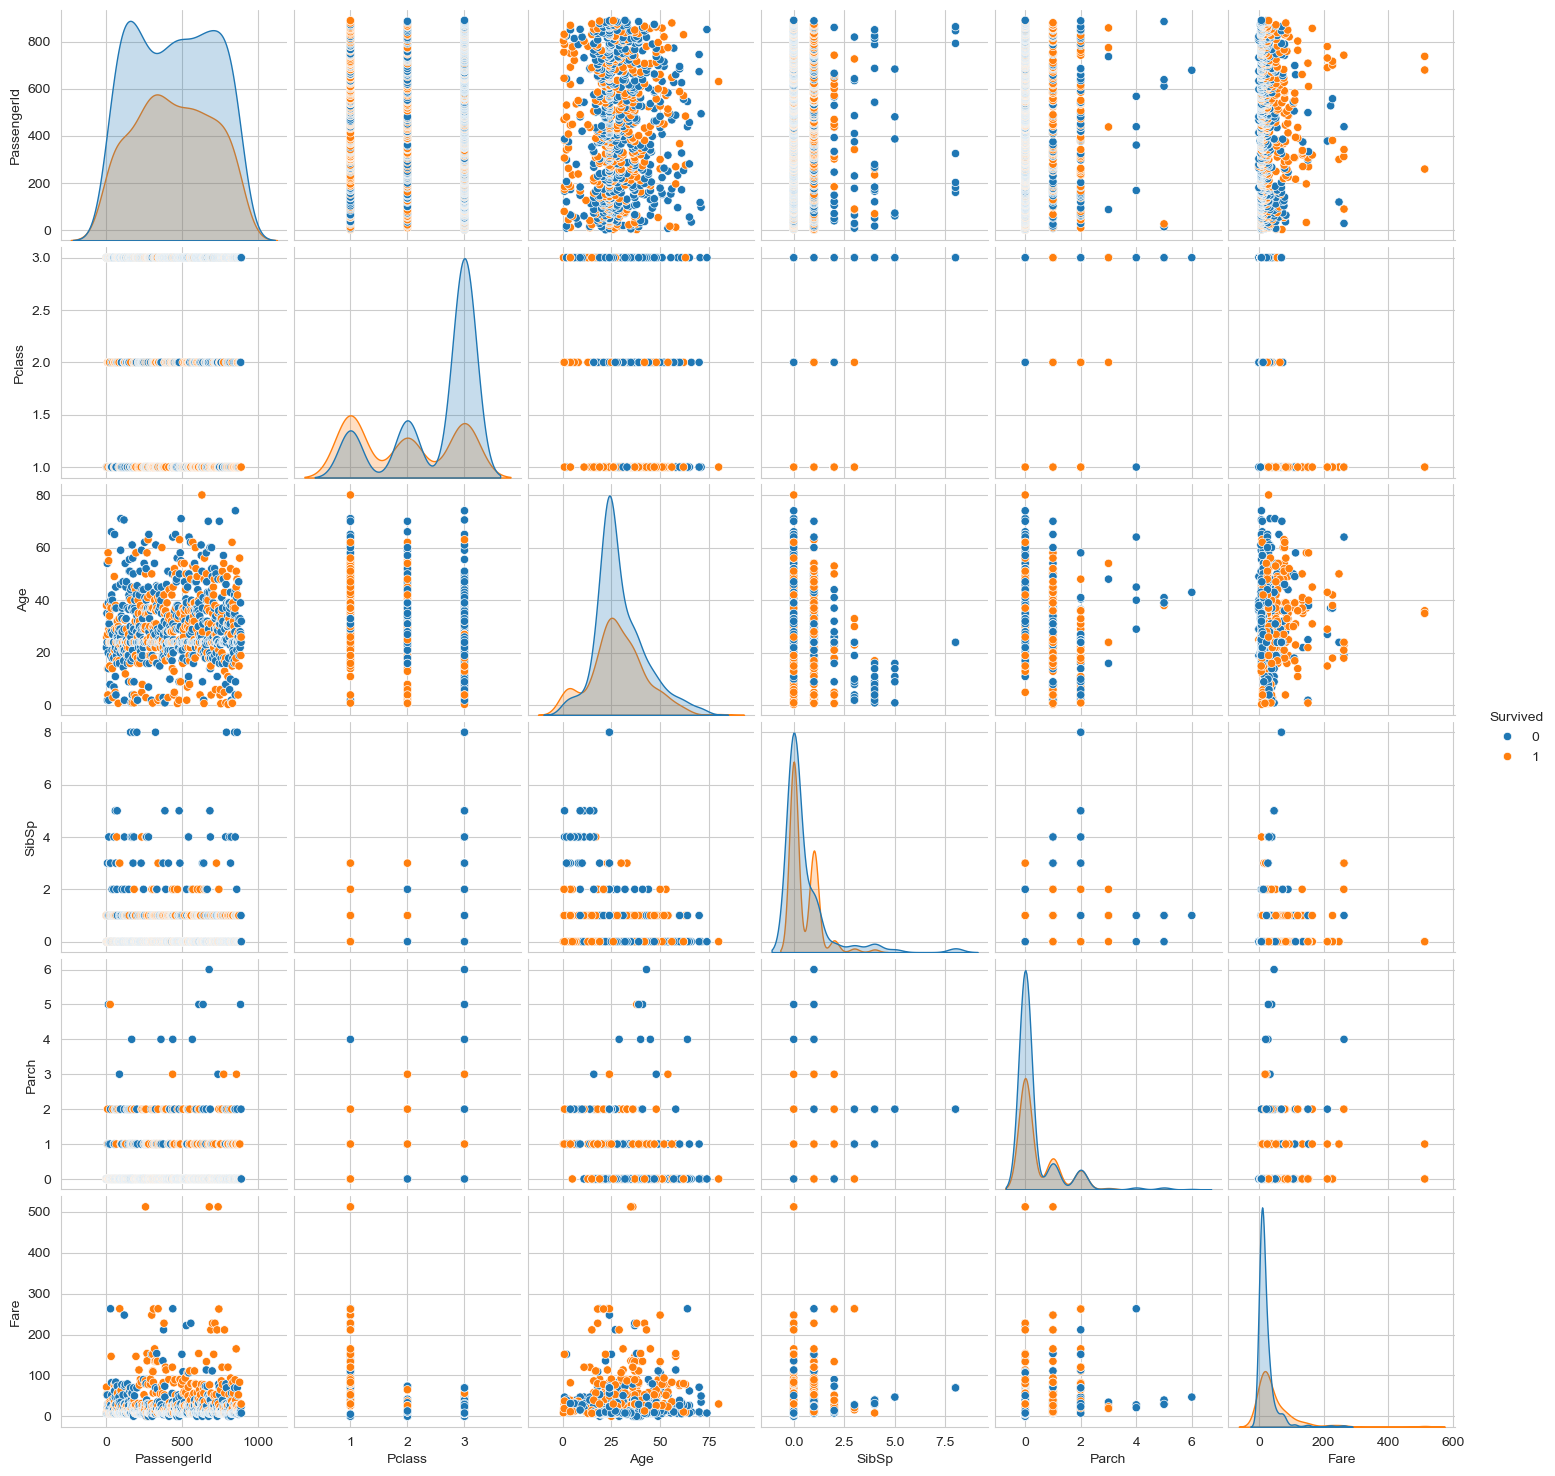

In [146]:
sns.pairplot(train, hue="Survived")

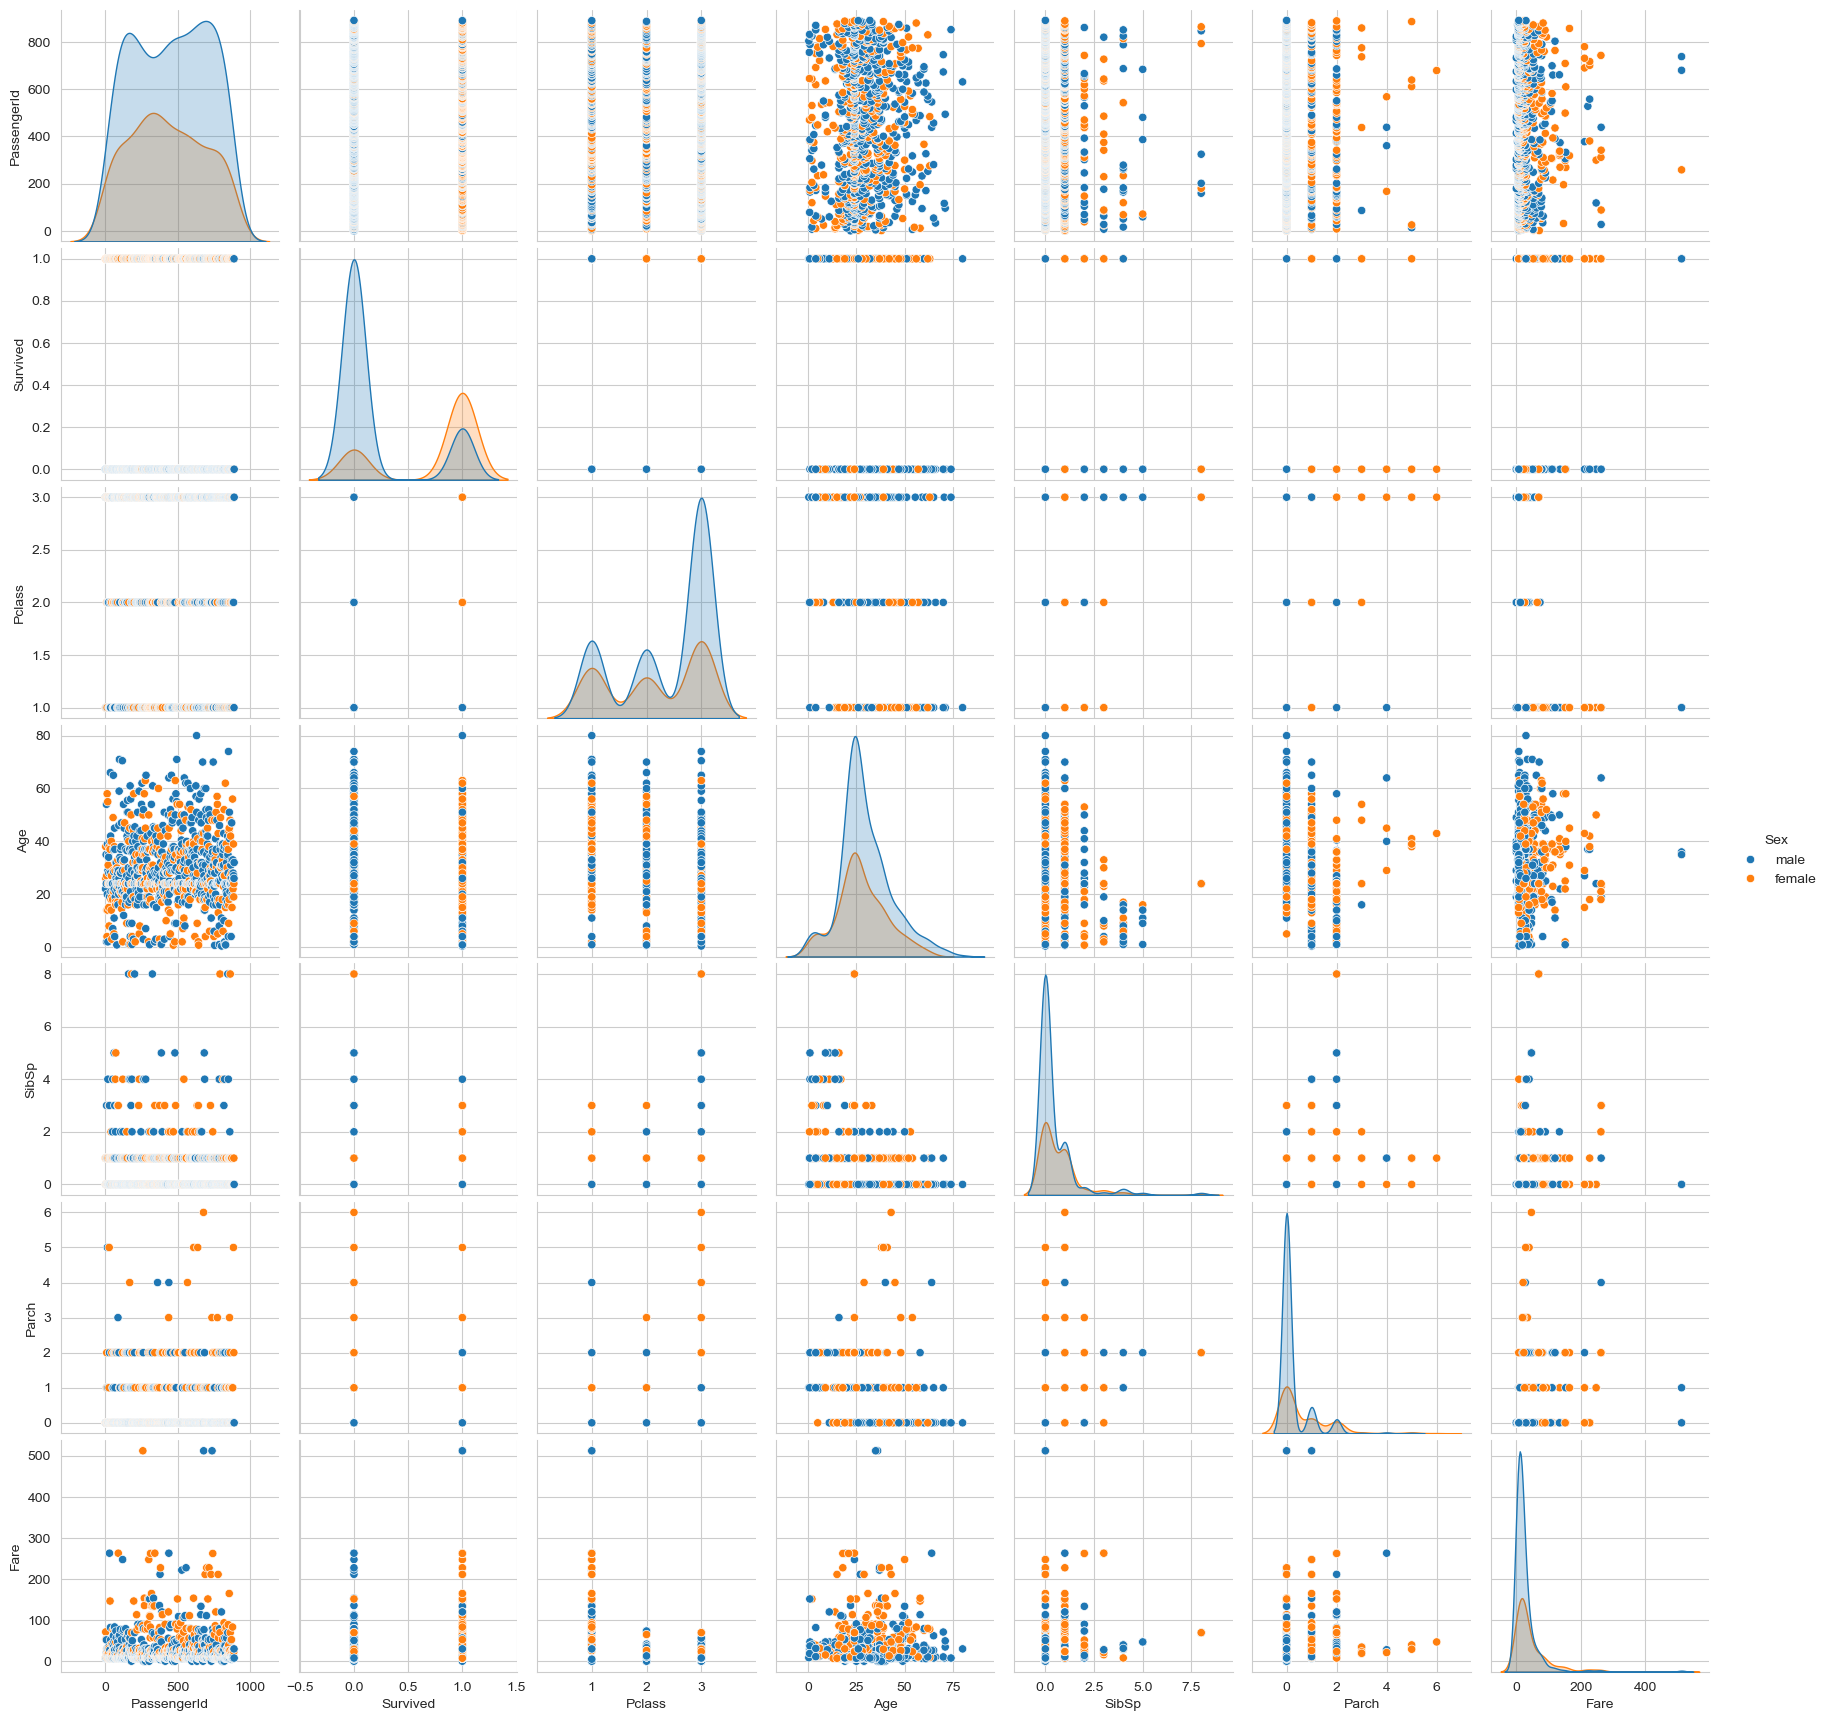

In [148]:
sns.pairplot(train, hue="Sex")